In [14]:
from datetime import datetime as dt

import numpy as np
import matplotlib.pyplot as plt

import patsy

%matplotlib nbagg

# Example 1

In [2]:
z = np.load('example_data.npz')
Y, ordinal = z['Y'], z['ordinal']

In [3]:
import yatsm
from yatsm.regression.transforms import harm
from yatsm._cyprep import get_valid_mask

In [4]:
design_str = '1 + x + harm(x, 1) + harm(x, 2)'
X = patsy.dmatrix('1 + x + harm(x, 1) + harm(x, 2)', {'x': ordinal})
design_dict = X.design_info.column_name_indexes
X = np.asarray(X)

Save unmasked data

In [5]:
np.savez_compressed('example_timeseries', **{
        'dates': ordinal,
        'X': X,
        'design_str': design_str, 
        'design_dict': design_dict,
        'Y': Y
})

Mask and save masked data

In [6]:
fmask = Y[-1, :] <= 1
valid = get_valid_mask(Y[:-2, :], np.array([0] * 6), np.array([10000] * 6))
mask = fmask & valid
mask_idx = np.where(mask)[0]

In [7]:
Y_masked = Y[:, mask_idx]
X_masked = X[mask_idx, :]
ordinal_masked = ordinal[mask_idx]

In [8]:
np.savez_compressed('example_timeseries_masked', **{
        'dates': ordinal_masked,
        'X': X_masked,
        'design_str': design_str, 
        'design_dict': design_dict,
        'Y': Y_masked
})

Some plots

<IPython.core.display.Javascript object>


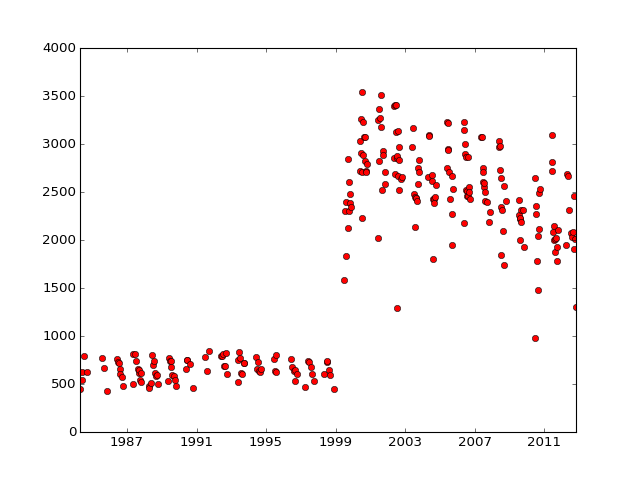

In [9]:
% matplotlib nbagg
from datetime import datetime as dt

plt.plot(map(dt.fromordinal, ordinal_masked), Y_masked[4, :], 'ro')

# Example 2

1 line from p013r031 subset

In [19]:
z = np.load('../../../../landsat_stack/p013r030/subset/cache/yatsm_r50_n423_b8.npy.npz')
Y, image_IDs = z['Y'], z['image_IDs']

ordinal = np.array([dt.strptime(_id[9:16], '%Y%j').toordinal() for _id in image_IDs])

design_str = '1 + x + harm(x, 1) + harm(x, 2)'
X = patsy.dmatrix('1 + x + harm(x, 1) + harm(x, 2)', {'x': ordinal})
design_dict = X.design_info.column_name_indexes
X = np.asarray(X)

np.savez_compressed('../../data/p013r030_r50_n423_b8.npz', **{
        'dates': ordinal,
        'X': X,
        'design_str': design_str, 
        'design_dict': design_dict,
        'Y': Y
})